# Handwritten Digit Classifier

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import learning_curve

from sklearn.datasets import load_files
from pyvi import ViTokenizer


from sklearn import svm
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline

%matplotlib inline

Dữ liệu training =  (1437, 64) (1437,)
Dữ liệu testing =  (360, 64) (360,)


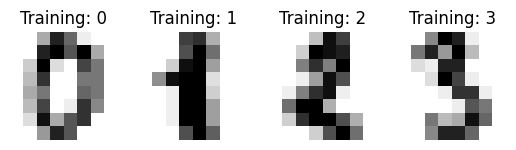

In [3]:
# Standard scientific Python imports
import matplotlib.pyplot as plt
# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics
# The digits dataset
digits = datasets.load_digits()
# The data that we are interested in is made of 8x8 images of digits, let's
# have a look at the first 4 images, stored in the `images` attribute of the
# dataset. If we were working from image files, we could load them using
# matplotlib.pyplot.imread. Note that each image must have the same size. For 
# these images, we know which digit they represent: it is given in the 
# 'target' of the dataset.
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:4]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap = plt.cm.gray_r, interpolation = 'nearest')
    plt.title('Training: %i' % label)
# To apply a classifier on this data, we need to flatten the image, to turn the data in a (samples, feature) matrix:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))
target = digits.target
X_train, X_test, y_train, y_test = train_test_split( data, target, test_size = 0.2)
print("Dữ liệu training = ", X_train.shape, y_train.shape)
print("Dữ liệu testing = ", X_test.shape, y_test.shape)

In [8]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 5.0, 10.0, 100], 
    'kernel': ['linear', 'poly', 'rbf'],
    'gamma': [0.0001, 0.001, 0.01, 0.1],}

grid_search = GridSearchCV(
    estimator = SVC(),
    param_grid = param_grid,
    cv = 10,
    scoring = 'accuracy',
    n_jobs = -1,
)

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best CV Accuracy:", grid_search.best_score_)

Best Parameters: {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
Best CV Accuracy: 0.9902583527583528


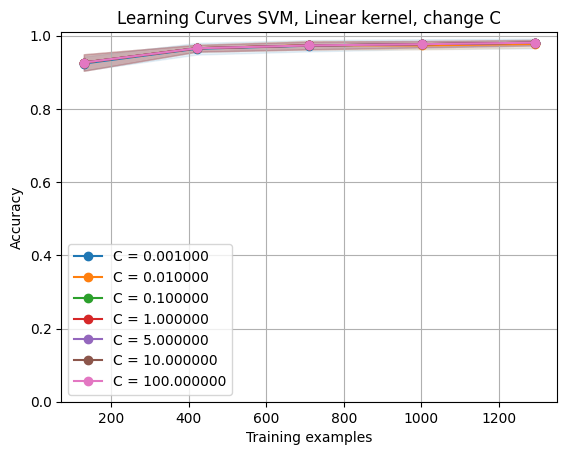

In [7]:
# Answer

# hàm sinh id màu  
def get_cmap(n):
    return 'C' + str(n)

# Hàm thực hiện training model, crossvalidate và vẽ lên đồ thị sử dụng mat libplot 
def plot_learning_curve(estimator, title, label_curve, X, y, ylim = None, cv = None,
                        n_jobs = 1, train_sizes = np.linspace(.1, 1.0, 5), new_plot = False,
                        idx_color = 0):
    
    # Khởi tạo bức ảnh mới với thư viện plot lib 
    if new_plot:
        # plt.figure()
        plt.title(title)
        plt.xlabel("Training examples")
        plt.ylabel("Accuracy")
        plt.grid()
    
    # chú thích nếu có 
    if ylim is not None:
        plt.ylim(*ylim)
        
    # thực hiện training model, ghi nhận các giá trị trong quá trình training 
    # cv = số fold cross validate, số phần bộ dữ liệu được chia để thực hiện training testing.
    # train_sizes = mảng tỉ lệ, các tỉ lệ được hệ thống chọn làm điểm dừng để thực hiện 1 testing 
    #  train_sizes = [0.3, 0.5] => hệ thống lấy 30 % dữ liệu để train và thực hiện test, tương tự 50 % ..
    # scoring = hàm mục tiêu để đánh giá chất lượng mô hình và vẽ lên đồ thị 
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring="accuracy")
    
    # Lấy trung bình cộng các giá trị output của các fold 
    train_scores_mean = np.mean(train_scores, axis = 1)
    train_scores_std = np.std(train_scores, axis = 1)
    test_scores_mean = np.mean(test_scores, axis = 1)
    test_scores_std = np.std(test_scores, axis = 1)
    
    # random 1 màu để vẽ 
    color = get_cmap(idx_color)
    
    # thực hiện vẽ các giá trị số lên đồ thị với màu vừa được random 
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha = 0.1, color = color)
    plt.plot(train_sizes, test_scores_mean, 'o-', color = color,
             label = label_curve)

    plt.legend(loc = "best")
    return plt

list_C = [0.001, 0.01, 0.1, 1, 5.0, 10.0, 100]
# model title 
title = "Learning Curves SVM, Linear kernel, change C"

# duyệt qua mảng các giá trị của tham số C 
for i, C in enumerate(list_C):
    # Với từng giá trị C nhận được, 
    # thực hiện build model và training cross-validate 
    # vẽ kết quả tìm được lên đồ thị đường. 
    text_clf = Pipeline([ 
                         ('clf', svm.SVC(kernel = 'linear', C = C)), # mô hình svm với tham số C 
                         ])
    
    plt = plot_learning_curve(text_clf, title, "C = %f" % (C),
                              X_train, y_train,
                              (0.0, 1.01), cv = 10, n_jobs = -1, idx_color = i, new_plot = i == 0)

# lưu hình ảnh ra file 
# plt.savefig('images/changeC.png', bbox_inches='tight')
plt.show()
